In [2]:
# Importing main libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
data = pd.read_csv("imdb_top_1000.csv")

# Quick look at the structure
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
# Removing columns that are not useful for analysis
data = data.drop(columns=["Poster_Link", "Overview"], errors="ignore")

# Checking missing values
print("Missing values before cleaning:")
print(data.isnull().sum())

# Filling or removing missing data
data = data.dropna(subset=["IMDB_Rating"])
data["Meta_score"].fillna(data["Meta_score"].mean(), inplace=True)
data["Certificate"].fillna("Unknown", inplace=True)

# Cleaning the runtime column
data["Runtime"] = data["Runtime"].astype(str).str.replace(" min", "", regex=False).astype(float)

# Converting the release year to numeric
data["Released_Year"] = pd.to_numeric(data["Released_Year"], errors="coerce")

# Removing duplicates
data.drop_duplicates(inplace=True)

print("\nDataset cleaned successfully!")


Missing values before cleaning:
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

Dataset cleaned successfully!


C:\Users\hadjs\AppData\Local\Temp\ipykernel_65880\4263325278.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Meta_score"].fillna(data["Meta_score"].mean(), inplace=True)
C:\Users\hadjs\AppData\Local\Temp\ipykernel_65880\4263325278.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

C:\Users\hadjs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


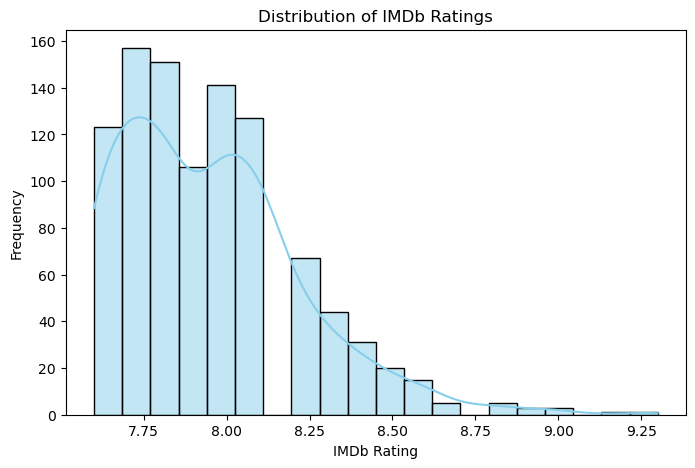

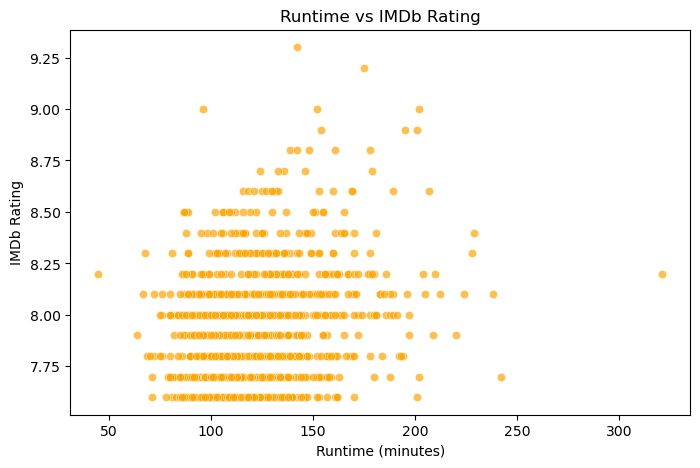

In [4]:
# Checking basic statistics
data.describe()

# Distribution of IMDb ratings
plt.figure(figsize=(8,5))
sns.histplot(data["IMDB_Rating"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Frequency")
plt.show()

# Relationship between movie duration and IMDb rating
plt.figure(figsize=(8,5))
sns.scatterplot(x="Runtime", y="IMDB_Rating", data=data, color="orange", alpha=0.7)
plt.title("Runtime vs IMDb Rating")
plt.xlabel("Runtime (minutes)")
plt.ylabel("IMDb Rating")
plt.show()


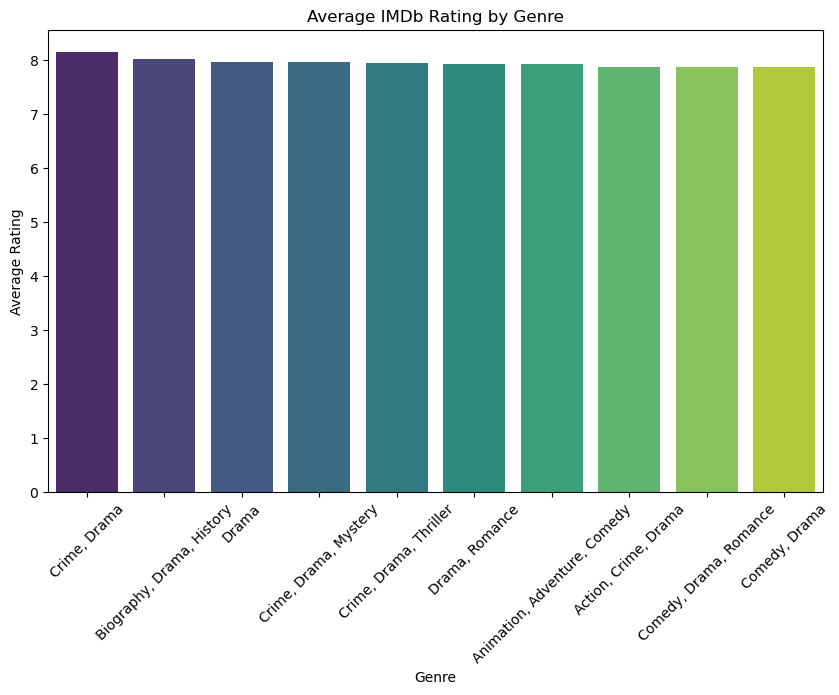

C:\Users\hadjs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hadjs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


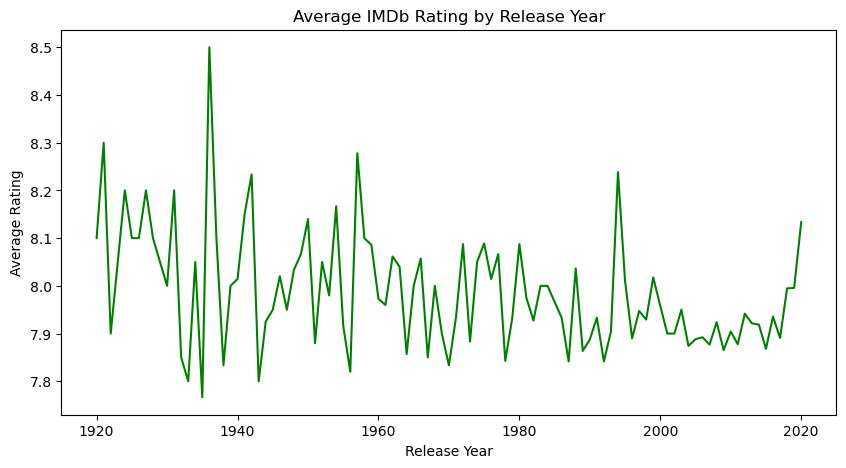

In [5]:
# Focusing on the 10 most frequent genres
top_genres = data["Genre"].value_counts().head(10).index
subset = data[data["Genre"].isin(top_genres)]

# Average rating by genre
genre_mean = subset.groupby("Genre")["IMDB_Rating"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_mean.index, y=genre_mean.values, palette="viridis")
plt.title("Average IMDb Rating by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

# Rating evolution over time
yearly_avg = data.groupby("Released_Year")["IMDB_Rating"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x="Released_Year", y="IMDB_Rating", data=yearly_avg, color="green")
plt.title("Average IMDb Rating by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Copy of the dataset for modeling
model_data = data.copy()

# Encoding categorical variables
for col in ["Genre", "Certificate", "Director"]:
    model_data[col] = LabelEncoder().fit_transform(model_data[col].astype(str))

# Selecting features and target
X = model_data[["Runtime", "Genre", "Certificate", "Director", "No_of_Votes", "Meta_score"]]
y = model_data["IMDB_Rating"]

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model evaluation results:
MAE: 0.17
RMSE: 0.21
R²: 0.31


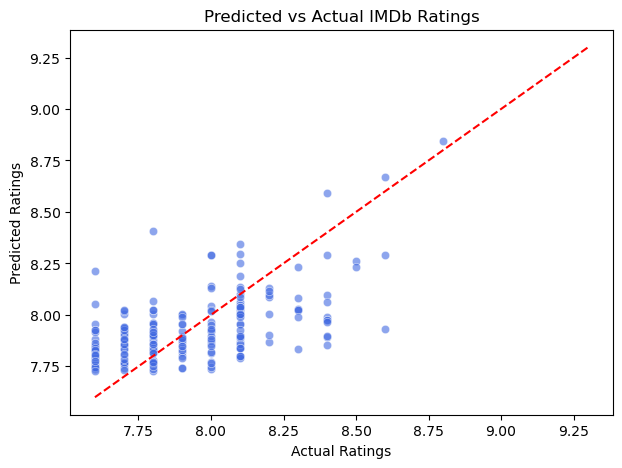

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Model training
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model evaluation results:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Comparing predicted vs real values
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, color="royalblue", alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.title("Predicted vs Actual IMDb Ratings")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.show()


## Conclusion

In this project, I explored and analyzed the IMDb Top 1000 Movies dataset to understand what factors might influence a movie’s rating.

After cleaning and visualizing the data, I trained a Gradient Boosting model to predict IMDb ratings.  
The model achieved an R² score of around **0.3**, which means it captures some trends but not all — likely because movie ratings depend on many complex factors (like marketing, social context, or emotions) that aren’t in the dataset.

Still, this project helped me strengthen my skills in:
- Data cleaning and preprocessing  
- Exploratory data analysis (EDA)  
- Regression modeling and evaluation  

In the future, I could improve this model by adding more features such as cast popularity, budget, or review sentiment analysis.
